# Import

In [137]:
import numpy as np
import pandas as pd
import torch
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#1KWh  = 3.6e+6J

# Helper Function

In [138]:
def load_result(csv_file, batch_size=1):
    df = pd.read_csv(csv_file)
    df_selected    = df# df.loc[:, ['duration', 'emissions','emissions_rate', 'cpu_power', 'gpu_power', 'ram_power',
                                # 'cpu_energy','gpu_energy', 'ram_energy', 'energy_consumed', 'cpu_count',
                                # 'cpu_model','gpu_count', 'gpu_model',  'ram_total_size']]

    energy_per_prompt = (df_selected["energy_consumed"]/batch_size).to_numpy()
    
    df_selected.insert(3, "Energy/Prompt (kWh/Prop)", energy_per_prompt, True)
    energy_per_prompt = (df_selected["gpu_energy"]/batch_size).to_numpy()
    # print(token_len_list)
    # print(energy_per_prompt)
    energy_per_prompt_j = (df_selected["gpu_energy"]*3.6e6/batch_size).to_numpy()

    
    df_selected.insert(3, "Energy/Prompt (kWh/Prop)", energy_per_prompt, True)

    df_selected['Energy(J)'] = df_selected['energy_consumed']*3.6e6*1.2

    # print(token_len_list,token_len_list*batch_size)
    return df_selected

# Result Path

In [139]:
controNet_path_l4 = 'emission_data/emissions_L4exGenImage_sd-controlnet-canny_batch_1.csv'
controNet_path_a100 = 'emission_data/emissions_A100exGenImage_sd-controlnet-canny_batch_1.csv'

stableDiffusion_path_l4 = 'emission_data/emissions_L4exGenImage_stable-diffusion-2-1_batch_1.csv'
stableDiffusion_path_a100 = 'emission_data/emissions_A100exGenImage_stable-diffusion-2-1_batch_1.csv'

TrOCR_path_l4 = 'emission_data/emissions_L4exGenImage_trocr-small-stage1_batch_1.csv'
TrOCR_path_a100 = 'emission_data/emissions_A100exGenImage_trocr-small-stage1_batch_1.csv'

stableDiffusion_v1_5_path_l4 = 'emission_data/emissions_L4exGenImage_stable-diffusion-v1-5_batch_1.csv'
stableDiffusion_v1_5_path_a100 = 'emission_data/emissions_A100exGenImage_stable-diffusion-v1-5_batch_1.csv'

riffusion_path_l4 = 'emission_data/emissions_L4exGenImage_riffusion-model-v1_batch_1.csv'
riffusion_path_a100 = 'emission_data/emissions_A100exGenImage_riffusion-model-v1_batch_1.csv'

# Load Results

In [140]:
df_controlNet_l4 = load_result(controNet_path_l4)
df_controlNet_a100 = load_result(controNet_path_a100)

df_stableDiff_l4 = load_result(stableDiffusion_path_l4)
df_stableDiff_a100 = load_result(stableDiffusion_path_a100)

df_TrOCR_l4 = load_result(TrOCR_path_l4)
df_TrOCR_a100 = load_result(TrOCR_path_a100)

df_stableDiff_v1_5_l4 = load_result(stableDiffusion_v1_5_path_l4)
df_stableDiff_v1_5_a100 = load_result(stableDiffusion_v1_5_path_a100)

df_riffusion_l4 = load_result(riffusion_path_l4)
df_riffusion_a100 = load_result(riffusion_path_a100)

In [141]:
df_controlNet_l4['Source'] = 'ControlNet'
df_controlNet_a100['Source'] = 'ControlNet'

df_stableDiff_l4['Source'] = 'Stable Diffusion V2.1'
df_stableDiff_a100['Source'] = 'Stable Diffusion V2.1'

df_TrOCR_l4['Source'] = 'TrOCR'
df_TrOCR_a100['Source'] = 'TrOCR'

df_stableDiff_v1_5_l4['Source'] = 'Stable Diffusion V1.5'
df_stableDiff_v1_5_a100['Source'] = 'Stable Diffusion V1.5'

df_riffusion_l4['Source'] = 'Riffusion'
df_riffusion_a100['Source'] = 'Riffusion'

In [142]:
df_controlNet_l4['GPU'] = 'L4'
df_controlNet_a100['GPU'] = 'A100'

df_stableDiff_l4['GPU'] = 'L4'
df_stableDiff_a100['GPU'] = 'A100'

df_TrOCR_l4['GPU'] = 'L4'
df_TrOCR_a100['GPU'] = 'A100'

df_stableDiff_v1_5_l4['GPU'] = 'L4'
df_stableDiff_v1_5_a100['GPU'] = 'A100'

df_riffusion_l4['GPU'] = 'L4'
df_riffusion_a100['GPU'] = 'A100'


#  Result Control Net

In [126]:
df_controlNet_l4['duration'].mean(),df_controlNet_l4['energy_consumed'].mean()*3.6e+6*1.2

(7.326733794212341, 1177.6327658679254)

In [8]:
df_controlNet_l4['gpu_energy'].mean()*3.6e+6,df_controlNet_l4['cpu_energy'].mean()*3.6e+6,df_controlNet_l4['ram_energy'].mean()*3.6e+6

(524.5222196173397, 311.3847500323972, 145.45366857359215)

In [9]:
df_controlNet_l4['gpu_power'].mean(),df_controlNet_l4['cpu_power'].mean(),df_controlNet_l4['ram_power'].mean()

(71.64280332617032, 42.5, 19.86054039001465)

In [127]:
df_controlNet_a100['duration'].mean(),df_controlNet_a100['energy_consumed'].mean()*3.6e+6*1.2

(3.6943646621704103, 1318.461132463289)

In [11]:
df_controlNet_a100['gpu_energy'].mean()*3.6e+6,df_controlNet_a100['cpu_energy'].mean()*3.6e+6,df_controlNet_a100['ram_energy'].mean()*3.6e+6

(826.1387809103231, 157.0091030597687, 115.56972641599866)

In [12]:
df_controlNet_a100['gpu_power'].mean(),df_controlNet_a100['cpu_power'].mean(),df_controlNet_a100['ram_power'].mean()

(215.56690963063946, 42.5, 31.30389261245728)

# Result Stable Diffusion 

In [128]:
df_stableDiff_l4['duration'].mean(),df_stableDiff_l4['energy_consumed'].mean()*3.6e+6*1.2

(6.997883234024048, 1123.0498890960107)

In [55]:
df_stableDiff_l4['gpu_energy'].mean()*3.6e+6,df_stableDiff_l4['cpu_energy'].mean()*3.6e+6,df_stableDiff_l4['ram_energy'].mean()*3.6e+6

(499.53417962682244, 297.4085570454597, 138.9321709077149)

In [15]:
df_stableDiff_l4['gpu_power'].mean(),df_stableDiff_l4['cpu_power'].mean(),df_stableDiff_l4['ram_power'].mean()

(71.4316973971344, 42.5, 19.86054039001465)

In [129]:
df_stableDiff_a100['duration'].mean(),df_stableDiff_a100['energy_consumed'].mean()*3.6e+6*1.2

(2.2982558250427245, 1134.6411706691615)

In [43]:
df_stableDiff_a100['gpu_energy'].mean()*3.6e6,df_stableDiff_a100['cpu_energy'].mean()*3.6e+6,df_stableDiff_a100['ram_energy'].mean()*3.6e+6

(776.0015408005561, 97.67446147203447, 71.85830661838779)

In [18]:
df_stableDiff_a100['gpu_power'].mean(),df_stableDiff_a100['cpu_power'].mean(),df_stableDiff_a100['ram_power'].mean()

(339.76767982037273, 42.5, 31.30389261245728)

# Result Stable Diffusion V1.5

In [130]:
df_stableDiff_v1_5_l4['duration'].mean(),df_stableDiff_v1_5_l4['energy_consumed'].mean()*3.6e+6*1.2

(3.3477612495422364, 535.6128030977059)

In [20]:
df_stableDiff_v1_5_l4['gpu_energy'].mean()*3.6e+6,df_stableDiff_v1_5_l4['cpu_energy'].mean()*3.6e+6,df_stableDiff_v1_5_l4['ram_energy'].mean()*3.6e+6

(237.63019010399995, 142.27848497629168, 66.43532750131929)

In [21]:
df_stableDiff_v1_5_l4['gpu_power'].mean(),df_stableDiff_v1_5_l4['cpu_power'].mean(),df_stableDiff_v1_5_l4['ram_power'].mean()

(71.15470492924716, 42.5, 19.86054039001465)

In [131]:
df_stableDiff_v1_5_a100['duration'].mean(),df_stableDiff_v1_5_a100['energy_consumed'].mean()*3.6e+6*1.2

(2.313199825286865, 720.0374997486875)

In [176]:
df_stableDiff_v1_5_a100['gpu_energy'].mean()*3.6e+6,df_stableDiff_v1_5_a100['cpu_energy'].mean()*3.6e+6,df_stableDiff_v1_5_a100['ram_energy'].mean()*3.6e+6

(429.4057435241184, 98.30959647893907, 72.31590978750897)

In [157]:
df_stableDiff_v1_5_a100['gpu_power'].mean(),df_stableDiff_v1_5_a100['cpu_power'].mean(),df_stableDiff_v1_5_a100['ram_power'].mean()

(185.87080814721958, 42.5, 31.30389261245728)

# Result Riffusion

In [132]:
df_riffusion_l4['duration'].mean(),df_riffusion_l4['energy_consumed'].mean()*3.6e+6*1.2

(3.3972460222244263, 543.7432965645473)

In [23]:
df_riffusion_l4['gpu_energy'].mean()*3.6e+6,df_riffusion_l4['cpu_energy'].mean()*3.6e+6,df_riffusion_l4['ram_energy'].mean()*3.6e+6

(241.31431305129593, 144.3815600514412, 67.4235407012754)

In [24]:
df_riffusion_l4['gpu_power'].mean(),df_riffusion_l4['cpu_power'].mean(),df_riffusion_l4['ram_power'].mean()

(71.20520179005514, 42.5, 19.86054039001465)

In [133]:
df_riffusion_a100['duration'].mean(),df_riffusion_a100['energy_consumed'].mean()*3.6e+6*1.2

(2.3377414083480836, 725.237694659252)

In [169]:
df_riffusion_a100['gpu_energy'].mean()*3.6e+6,df_riffusion_a100['cpu_energy'].mean()*3.6e+6,df_riffusion_a100['ram_energy'].mean()*3.6e+6

(431.9330255459712, 99.35263199806215, 73.07908800535193)

In [161]:
df_riffusion_a100['gpu_power'].mean(),df_riffusion_a100['cpu_power'].mean(),df_riffusion_a100['ram_power'].mean()

(185.9299431566782, 42.5, 31.30389261245728)

# Result TrOCR

In [134]:
df_TrOCR_l4['duration'].mean(),df_TrOCR_l4['energy_consumed'].mean()*3.6e+6*1.2

(0.06025760650634762, 6.521002591688232)

In [27]:
df_TrOCR_l4['gpu_power'].mean(),df_TrOCR_l4['cpu_power'].mean(),df_TrOCR_l4['ram_power'].mean()

(30.117906856474928, 42.5, 19.86054039001465)

In [10]:
df_TrOCR_l4['gpu_energy'].mean()*3.6e+6,df_TrOCR_l4['cpu_energy'].mean()*3.6e+6,df_TrOCR_l4['ram_energy'].mean()*3.6e+6

(1.7237813790238685, 2.5595694065094, 1.1508180408735917)

In [135]:
df_TrOCR_a100['duration'].mean(),df_TrOCR_a100['energy_consumed'].mean()*3.6e+6*1.2

(0.0411907052993774, 5.856672888511468)

In [165]:
df_TrOCR_a100['gpu_power'].mean(),df_TrOCR_a100['cpu_power'].mean(),df_TrOCR_a100['ram_power'].mean()

(48.96684408703529, 42.5, 31.30389261245728)

In [11]:
df_TrOCR_a100['gpu_energy'].mean()*3.6e+6,df_TrOCR_a100['cpu_energy'].mean()*3.6e+6,df_TrOCR_a100['ram_energy'].mean()*3.6e+6

(1.9230815384629896, 1.7491523385047911, 1.2083268634584419)

# Plotting

In [110]:
combined_df = pd.concat([df_controlNet_l4,df_controlNet_a100,
                         df_stableDiff_l4,df_stableDiff_a100,
                         df_stableDiff_v1_5_l4,df_stableDiff_v1_5_a100,
                         df_riffusion_l4,df_riffusion_a100,
                         df_TrOCR_l4,df_TrOCR_a100])

In [115]:
combined_df['Enegy(J)'] = combined_df['energy_consumed']*3.6e6

In [ ]:
sns.barplot(data=combined_df, x='GPU', y='gpu_power', hue='Source')
plt.legend(ncol = 3, loc = (.00,1.05))
plt.xlabel('GPU')
plt.ylabel('Gpu Power')
# plt.ylim(800,)
plt.show()

In [ ]:
sns.barplot(data=combined_df, x='GPU', y='duration', hue='Source')
plt.legend(ncol = 3, loc = (.0,1.05))
plt.xlabel('GPU')
plt.ylabel('Duration (Sec)')
# plt.ylim(800,)
plt.show()

In [ ]:
sns.barplot(data=combined_df, x='GPU', y='Enegy(J)', hue='Source')
plt.legend(ncol = 3, loc = (.0,1.05))
plt.xlabel('GPU')
plt.ylabel('Energy')
# plt.ylim(800,)
plt.show()

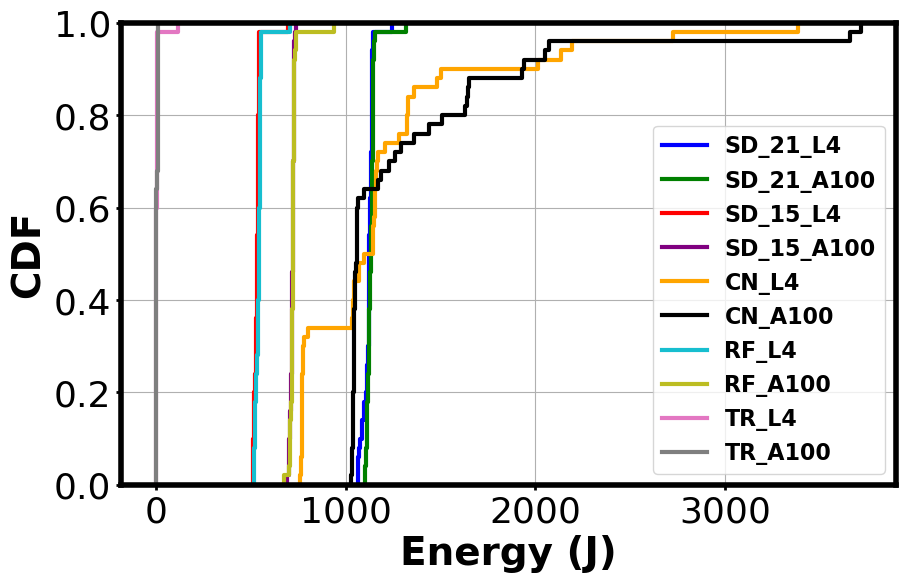

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Plot CDF for each dataset with distinct colors, line styles, and markers
sns.ecdfplot(df_stableDiff_l4['Energy(J)'], label='SD_21_L4', color='blue',   linewidth=3)
sns.ecdfplot(df_stableDiff_a100['Energy(J)'], label='SD_21_A100', color='green',  linewidth=3)
sns.ecdfplot(df_stableDiff_v1_5_l4['Energy(J)'], label='SD_15_L4', color='red',linewidth=3)
sns.ecdfplot(df_stableDiff_v1_5_a100['Energy(J)'], label='SD_15_A100', color='purple',  linewidth=3)
sns.ecdfplot(df_controlNet_l4['Energy(J)'], label='CN_L4', color='orange',   linewidth=3)
sns.ecdfplot(df_controlNet_a100['Energy(J)'], label='CN_A100', color='black',  linewidth=3)
sns.ecdfplot(df_riffusion_l4['Energy(J)'], label='RF_L4', color='tab:cyan', linewidth=3)
sns.ecdfplot(df_riffusion_a100['Energy(J)'], label='RF_A100', color='tab:olive',  linewidth=3)
sns.ecdfplot(df_TrOCR_l4['Energy(J)'], label='TR_L4', color='tab:pink',  linewidth=3)
sns.ecdfplot(df_TrOCR_a100['Energy(J)'], label='TR_A100', color='tab:grey',  linewidth=3)
# Add labels and title
plt.xlabel('Energy (J)', fontsize=28,weight = 'bold')
plt.ylabel('CDF', fontsize=28,weight = 'bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(4)  # You can adjust the linewidth as needed
ax.tick_params(axis='both', which='major', labelsize=26, width=2)  # You can adjust the size and width as needed
ax.tick_params(axis='both', which='minor', labelsize=26, width=2)  # For minor ticks if needed
plt.grid()
# plt.legend(ncol = 5, prop={'size': 12, 'weight': 'bold'},loc = (.0,1.05))  # Increase size and make bold
plt.legend(prop={'size': 16, 'weight': 'bold'})
# Show plot
plt.show()

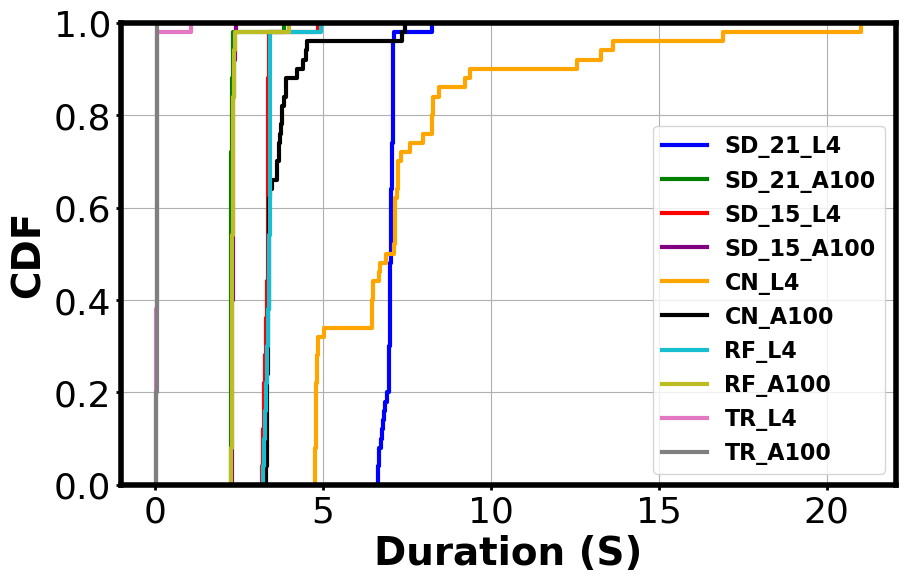

In [124]:
plt.figure(figsize=(10, 6))

# Plot CDF for each dataset with distinct colors, line styles, and markers
sns.ecdfplot(df_stableDiff_l4['duration'], label='SD_21_L4', color='blue',   linewidth=3)
sns.ecdfplot(df_stableDiff_a100['duration'], label='SD_21_A100', color='green',  linewidth=3)
sns.ecdfplot(df_stableDiff_v1_5_l4['duration'], label='SD_15_L4', color='red',linewidth=3)
sns.ecdfplot(df_stableDiff_v1_5_a100['duration'], label='SD_15_A100', color='purple',  linewidth=3)
sns.ecdfplot(df_controlNet_l4['duration'], label='CN_L4', color='orange',   linewidth=3)
sns.ecdfplot(df_controlNet_a100['duration'], label='CN_A100', color='black',  linewidth=3)
sns.ecdfplot(df_riffusion_l4['duration'], label='RF_L4', color='tab:cyan', linewidth=3)
sns.ecdfplot(df_riffusion_a100['duration'], label='RF_A100', color='tab:olive',  linewidth=3)
sns.ecdfplot(df_TrOCR_l4['duration'], label='TR_L4', color='tab:pink',  linewidth=3)
sns.ecdfplot(df_TrOCR_a100['duration'], label='TR_A100', color='tab:grey',  linewidth=3)
# Add labels and title
plt.xlabel('Duration (S)', fontsize=28,weight = 'bold')
plt.ylabel('CDF', fontsize=28,weight = 'bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(4)  # You can adjust the linewidth as needed
ax.tick_params(axis='both', which='major', labelsize=26, width=2)  # You can adjust the size and width as needed
ax.tick_params(axis='both', which='minor', labelsize=26, width=2)  # For minor ticks if needed
plt.grid()
# plt.legend(ncol = 5, prop={'size': 12, 'weight': 'bold'},loc = (.0,1.05))  # Increase size and make bold
plt.legend(prop={'size': 16, 'weight': 'bold'})
# Show plot
plt.show()